## [LINK](https://www.allaboutcircuits.com/technical-articles/transmission-lines-from-lumped-element-to-distributed-element-regimes/)

Text(0.5,0,u'Wire length - d (in multiples of wavelength)')

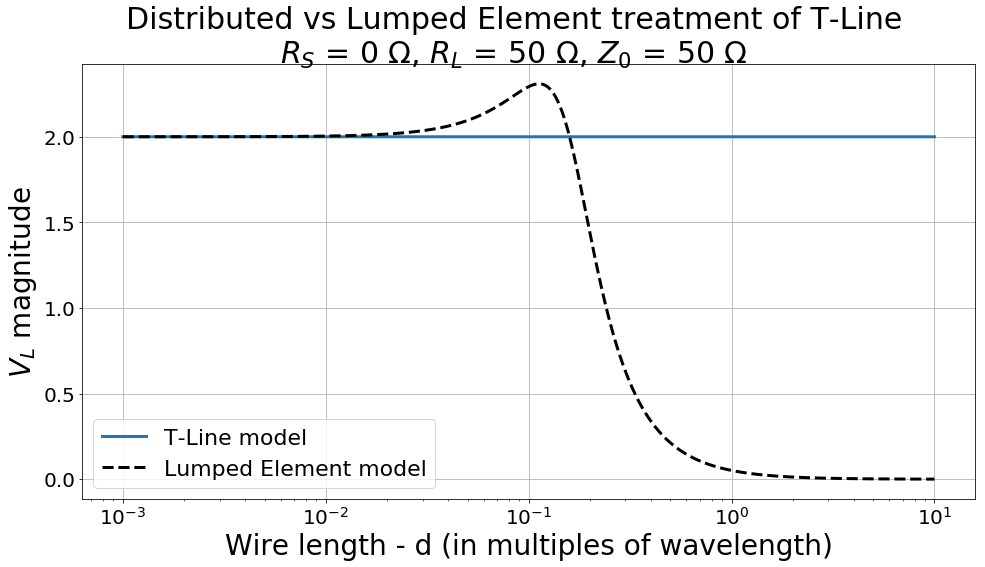

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Wire Model
# When does wire need to be treated as T-Line? And when
# does T-Line behavior deviate from simple lumped element?


def tanOfArray(some_array):
    c = np.array([np.tan(2*math.pi*a) for a in some_array])
    return c

def expOfArray(some_array,sign):
    c = np.array([np.exp(sign*2j*math.pi*a) for a in some_array])
    return c


# TL impedance
Zo = 50.0
# Source impedance
RS = 0.0
# Load impedance
RL = 50.0
# Source amplitude
Vs = 2.0
# Automatically generate title string for values above
title = "Distributed vs Lumped Element treatment of T-Line\n$R_S $ = "+str(int(RS))+" $\Omega $, "+"$R_L $ = "+str(int(RL))+" $\Omega $, "+"$Z_0 $ = "+str(int(Zo))+" $\Omega $"

# step (resolution) of inputs
SCALE = 0.001
# generate inputs
d = np.arange(0.001,10+SCALE,SCALE)

# Transmission line calculations
GL = (RL-Zo) / (RL+Zo)
num = RL + 1j*Zo*tanOfArray(d)
den = Zo + 1j*RL*tanOfArray(d)
Zin = Zo*(num / den)
Vin = Vs*Zin / (Zin+RS)
Vop = Vin / (expOfArray(d,1) + GL * expOfArray(d,-1))
vLTL = Vop*(1.0+GL) 
VLTL = np.abs(vLTL) #V_Load_Transmission_Line
phLTL = 180.0 * np.angle(vLTL) / math.pi #phase_Load_Transmission_line

#Lumped element calculations
A = -1j*Zo/(2*math.pi*d)
Z1 = (RL*A) / (RL + A)
Z2 = RS+2j*math.pi*Zo*d
vLle = Vs * Z1 / (Z1+Z2)
VLle = np.abs(vLle) # V_Load_lumped_element
phle = 180 * np.angle(vLle) / math.pi #phase_load_lumped_element

#generate plot
fig = plt.figure(figsize=[16,8])
fig.suptitle(title, fontsize=30)
#ax1 = fig.add_subplot(211) #used if also plotting the phase in 2nd sublot
ax1 = fig.add_subplot(111)
plt.semilogx(d,VLTL,d,VLle,'--k', lw=3)
plt.ylabel('$V_L $ magnitude',fontsize=28)
plt.grid(True)
plt.legend(['T-Line model','Lumped Element model'],loc=3,fontsize=22)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

"""
# ==================== 2nd plot unused this time ===============
# generate second plot for phase
ax2 = fig.add_subplot(212)
plt.semilogx(d,phLTL,d,phle,'--k',lw=2)
plt.axis([.01,10,-180,180])
g = plt.gca()
g.set_yticks(range(-180,181,60))
plt.ylabel('VL phase (deg)',fontsize=24)
plt.legend(['T-line model', 'lumped element model'],loc=3,fontsize=18)
plt.xlabel('Wire length - d (in multiples of wavelength)',fontsize=28)
plt.grid(True)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
"""
plt.xlabel('Wire length - d (in multiples of wavelength)',fontsize=28)